OBTENCION DE DATOS

In [88]:
# Importamos las librerias necesarias

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
data_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

SP500Companies = pd.read_html(data_url)[0]

# Renombramos las columnas por comodidad
SP500Companies.rename(columns={'GICS Sector': 'Sector'}, inplace=True)

# Renombramos algunos simbolos para evitar problemas a futuro
SP500Companies['Symbol'] = SP500Companies['Symbol'].str.strip().replace({'BF.B': 'BF-B', 'BRK.B': 'BRK-B'})

# Definir el rango de fechas
start_date = '2000-01-01'
end_date = '2023-03-01'

# Crear un DataFrame vacío para almacenar los datos
sp500_data = pd.DataFrame()

# Iterar a través de cada compañia del SP500 y agregamos los datos al Dataframe creado
for _, company in SP500Companies.iterrows():
    symbol = company['Symbol']
    sector = company['Sector']
    # Descargamos los datos de cada compañia
    data = yf.download(symbol, start=start_date, end=end_date)['Adj Close']
    if len(data) > 0:
        data = data.to_frame()
        data.loc[:, 'Symbol'] = symbol
        data.loc[:, 'Sector'] = sector
        sp500_data = pd.concat([sp500_data, data], axis=0)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [90]:
# Obteniendo datos solo del SP500
sp500_index = yf.download('^GSPC', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [91]:
#Visualizamos ambos dataframes dataframes

sp500_data.head(5)

,Adj Close,Symbol,Sector
Date,,,
2000-01-03,25.525509,MMM,Industrials
2000-01-04,24.511255,MMM,Industrials
2000-01-05,25.221243,MMM,Industrials
2000-01-06,27.249754,MMM,Industrials
2000-01-07,27.790693,MMM,Industrials


In [92]:
sp500_index.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


In [93]:
# Guardo ambos datasets en archivos csv
sp500_index.to_csv('GSPC.csv')
sp500_data.to_csv('companies.csv')

In [94]:
# Abrimos el dataset de GSPC
sp500 = pd.read_csv('GSPC.csv')

# Cambiamos su indice a date
sp500.set_index('Date', inplace=True)

In [95]:
# index este en formato fecha
sp500.index= pd.to_datetime(sp500.index)

In [96]:
# Nombre del dia
sp500['Day Name'] = sp500.index.day_name()

# Tasa del retorno activo

sp500['Daily Return'] = sp500['Adj Close'].pct_change()

EDA - PREVISUALIZACION DE LOS DATOS

In [97]:
# Reabrimos el csv 
sp500 = pd.read_csv('GSPC.csv')

# Hacemos que el indice sea la columna date y nos aseguremos que este en formato fecha
sp500.set_index('Date', inplace=True)
sp500.index = pd.to_datetime(sp500.index)

In [98]:
# Revisamos duplicados
sp500[sp500.duplicated()] 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [99]:
# Veamos los valores nulos
sp500.isnull().sum().sort_values(ascending=False)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [100]:
#Importamos los modulos necesarios para un visualizacion primera de los datos
import statsmodels.api as sm
import plotly.graph_objs as go
import plotly.express as px

# Aplicando el filtro Hodrick-Prescott para separar en tendencia y 
# componente ciclico.
sp500_index_ciclo, sp500Indice_tend = sm.tsa.filters.hpfilter(sp500_index['Adj Close'])
sp500_index['tend'] = sp500Indice_tend


fig = go.Figure(data=go.Scatter(x=sp500_index.index, y=sp500_index['tend']))
fig.update_layout(title='S&P 500 Index',
                  xaxis_title='Date',
                  yaxis_title='tend Price', 
                  plot_bgcolor='black',
                  xaxis=dict(linecolor='white', showgrid=False),
                  yaxis=dict(linecolor='white', showgrid=False),)

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(count=5, label="5y", step="year", stepmode="backward"),
                dict(label="All", step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    ),
    yaxis=dict(
        fixedrange=False
    ),
    margin=dict(l=50, r=50, b=50, t=50, pad=4),
    height=600,
)


# Guardamos la visualizacion de los datos en un tipo de archivo que me permita ver el total de la figura, evitando asi
#errores en este archivo
fig.write_html("visualizacion.html")

In [101]:
# Guardamos
sp500.to_csv('GSPC.csv')

In [102]:
# Revisamos el resultado final
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


In [103]:
SP500Companies = pd.read_csv('companies.csv')

# Setteamos como indice la columna Date y nos aseguremos que tenga sea reconocida como fecha
SP500Companies.set_index('Date', inplace=True)
SP500Companies.index = pd.to_datetime(SP500Companies.index)

In [104]:
# Agregamos las columnas
SP500Companies['Day Name'] = SP500Companies.index.day_name()
SP500Companies['Daily Return']=SP500Companies['Adj Close'].pct_change() 

In [105]:
# Visualizacion de los datos modificados/agregados
SP500Companies.head()

,Adj Close,Symbol,Sector,Day Name,Daily Return
Date,,,,,
2000-01-03,25.525509,MMM,Industrials,Monday,NaN
2000-01-04,24.511255,MMM,Industrials,Tuesday,-0.039735
2000-01-05,25.221243,MMM,Industrials,Wednesday,0.028966
2000-01-06,27.249754,MMM,Industrials,Thursday,0.080429
2000-01-07,27.790693,MMM,Industrials,Friday,0.019851


In [106]:
# Revisamos duplicados
SP500Companies[SP500Companies.duplicated()]

,Adj Close,Symbol,Sector,Day Name,Daily Return
Date,,,,,
2002-09-13,3.488165,AOS,Industrials,Friday,0.000000
2002-12-13,12.841617,ACN,Information Technology,Friday,-0.006764
2005-03-24,17.782938,ACN,Information Technology,Thursday,0.004115
2000-09-21,1.071276,ATVI,Communication Services,Thursday,0.000000
2010-06-21,10.370571,ATVI,Communication Services,Monday,0.006103
...,...,...,...,...,...
2000-03-24,7.188654,XEL,Utilities,Friday,0.003322
2000-07-10,8.236850,XEL,Utilities,Monday,0.011904
2000-11-27,10.450389,XEL,Utilities,Monday,-0.016470


In [107]:
# Revisamos valores nulos
SP500Companies.isna().sum().sort_values(ascending=False)

Daily Return    1
Adj Close       0
Symbol          0
Sector          0
Day Name        0
dtype: int64

In [108]:
# Completamos los valores nulos con 0 para evitar mayores complicaciones
SP500Companies.fillna(0)

,Adj Close,Symbol,Sector,Day Name,Daily Return
Date,,,,,
2000-01-03,25.525509,MMM,Industrials,Monday,0.000000
2000-01-04,24.511255,MMM,Industrials,Tuesday,-0.039735
2000-01-05,25.221243,MMM,Industrials,Wednesday,0.028966
2000-01-06,27.249754,MMM,Industrials,Thursday,0.080429
2000-01-07,27.790693,MMM,Industrials,Friday,0.019851
...,...,...,...,...,...
2023-02-22,166.429993,ZTS,Health Care,Wednesday,-0.020078
2023-02-23,169.500000,ZTS,Health Care,Thursday,0.018446
2023-02-24,166.330002,ZTS,Health Care,Friday,-0.018702


In [109]:
# Guardamos el nuevo dataset
SP500Companies.to_csv('companies.csv')

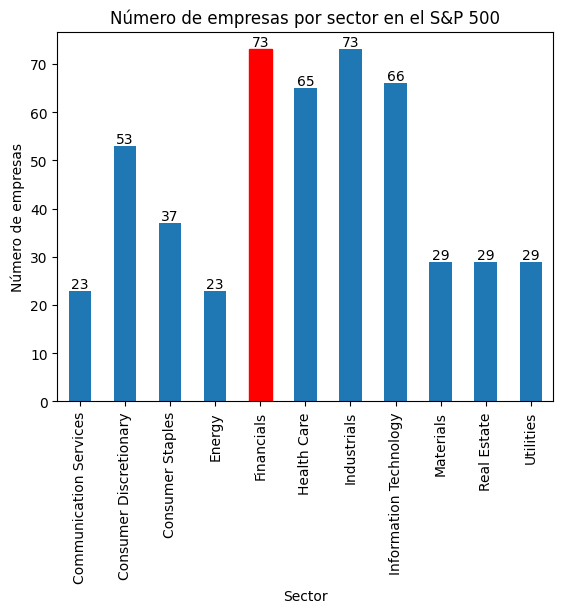

In [110]:
import numpy as np
import matplotlib.pyplot as plt

# Teniendo en cuenta que las empresas, en este indice, se agrupan por sector:
empresas_por_sector = SP500Companies.groupby('Sector')['Symbol'].nunique()
empresas_por_sector

empresas_por_sector.plot(kind='bar')

# Agregar etiquetas a las barras
for i, v in enumerate(empresas_por_sector.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
    
plt.title('Número de empresas por sector en el S&P 500')
plt.xlabel('Sector')
plt.ylabel('Número de empresas')

# Resaltar la barra más alta
max_index = np.argmax(empresas_por_sector)
plt.gca().patches[max_index].set_color('red')
plt.savefig("Numero_empresas_sector.png")
plt.show()
empresas_por_sector.to_csv("empresas_por_sector.csv")

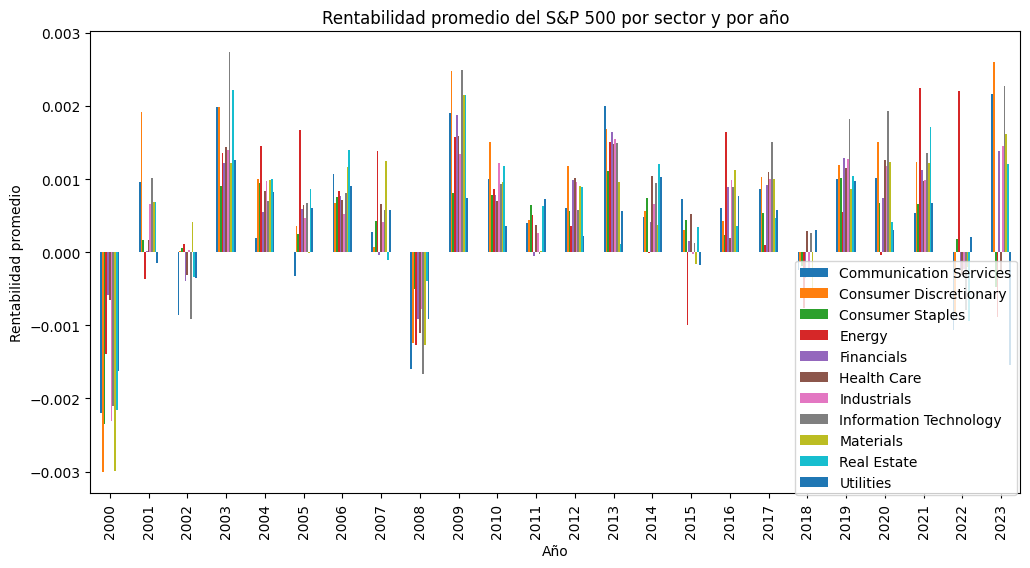

In [111]:
import matplotlib.pyplot as plt
# Agrupar los datos por sector y por año, y calcular la rentabilidad promedio
returns_by_sector_year = SP500Companies.groupby(['Sector', SP500Companies.index.year])['Daily Return'].mean()

# Reorganizar los datos para que cada sector sea una columna y cada año sea un índice
returns_by_sector_year = returns_by_sector_year.unstack('Sector')

# Graficar los resultados
returns_by_sector_year.plot(kind='bar', figsize=(12,6))
plt.xlabel('Año')
plt.ylabel('Rentabilidad promedio')
plt.title('Rentabilidad promedio del S&P 500 por sector y por año')
plt.legend(loc='center left', bbox_to_anchor=(0.75, 0.25))
plt.savefig("Rentabilidad_promedio_del_S&P_500_por_sector_y_por_año.png")
plt.show()
returns_by_sector_year.to_csv("Rentabilidad promedio del S&P 500 por sector y por año.csv")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  11 of 11 completed


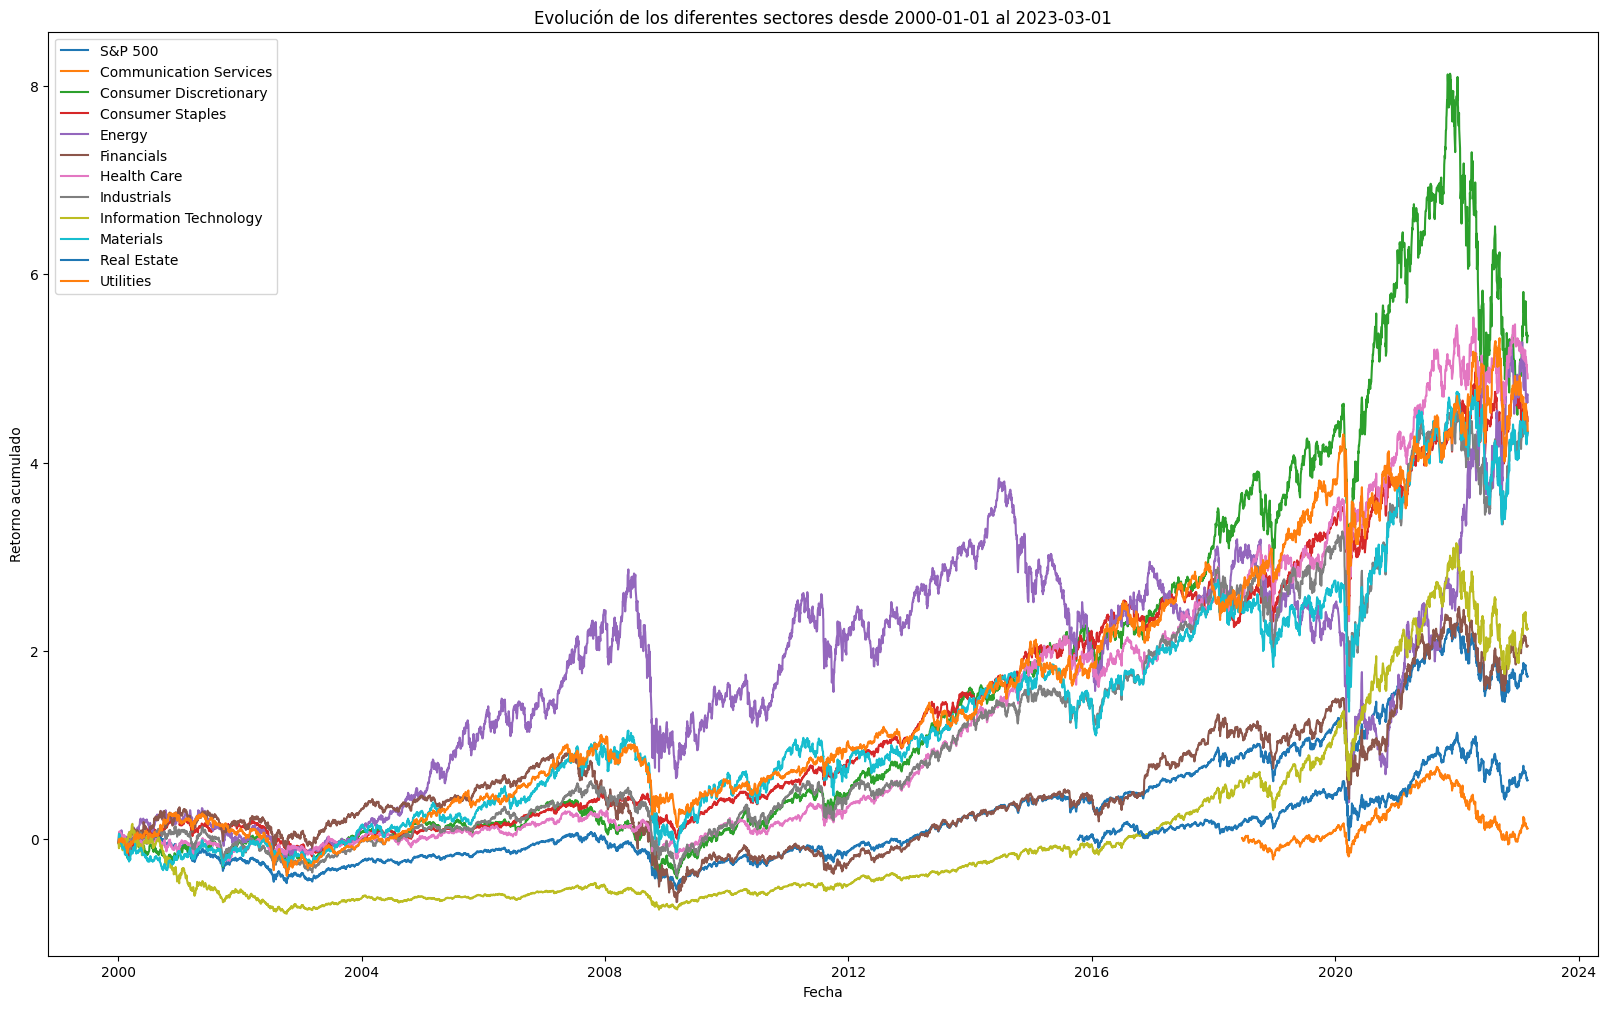

In [112]:
import yfinance as yf
import matplotlib.pyplot as plt

# Definir el período de tiempo
start_date = "2000-01-01"
end_date = "2023-03-01"

# Obtener los datos del S&P 500
sp500 = yf.download("^GSPC", start=start_date, end=end_date)

# Definir los nombres de los sectores
sector_names = {
    "XLC": "Communication Services",
    "XLY": "Consumer Discretionary",
    "XLP": "Consumer Staples",
    "XLE": "Energy",
    "XLF": "Financials",
    "XLV": "Health Care",
    "XLI": "Industrials",
    "XLK": "Information Technology",
    "XLB": "Materials",
    "XLRE": "Real Estate",
    "XLU": "Utilities"
}

# Obtener los datos de los diferentes sectores
sectors = list(sector_names.keys())
sector_data = yf.download(sectors, start=start_date, end=end_date)

# Obtener los precios de cierre ajustados
sp500_close = sp500["Adj Close"]
sector_close = sector_data["Adj Close"]

# Calcular los retornos diarios
sp500_returns = sp500_close.pct_change()
sector_returns = sector_close.pct_change()

# Calcular los retornos acumulados
sp500_cum_returns = (1 + sp500_returns).cumprod() - 1
sector_cum_returns = (1 + sector_returns).cumprod() - 1

# Crear el gráfico de líneas
plt.figure(figsize=(20, 12))
plt.plot(sp500_cum_returns.index, sp500_cum_returns, label="S&P 500")
for sector in sectors:
    plt.plot(sector_cum_returns[sector].index, sector_cum_returns[sector], label=sector_names[sector])
plt.legend()
plt.title("Evolución de los diferentes sectores desde 2000-01-01 al 2023-03-01")
plt.xlabel("Fecha")
plt.ylabel("Retorno acumulado")
plt.savefig("Evolución_de_los_diferentes_sectores_desde_2000-01-01_al_2023-03-01.png")
plt.show()
sp500_cum_returns.to_csv("sp500_cum_returns.csv")
sector_cum_returns.to_csv("sector_cum_returns.csv")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  2 of 2 completed


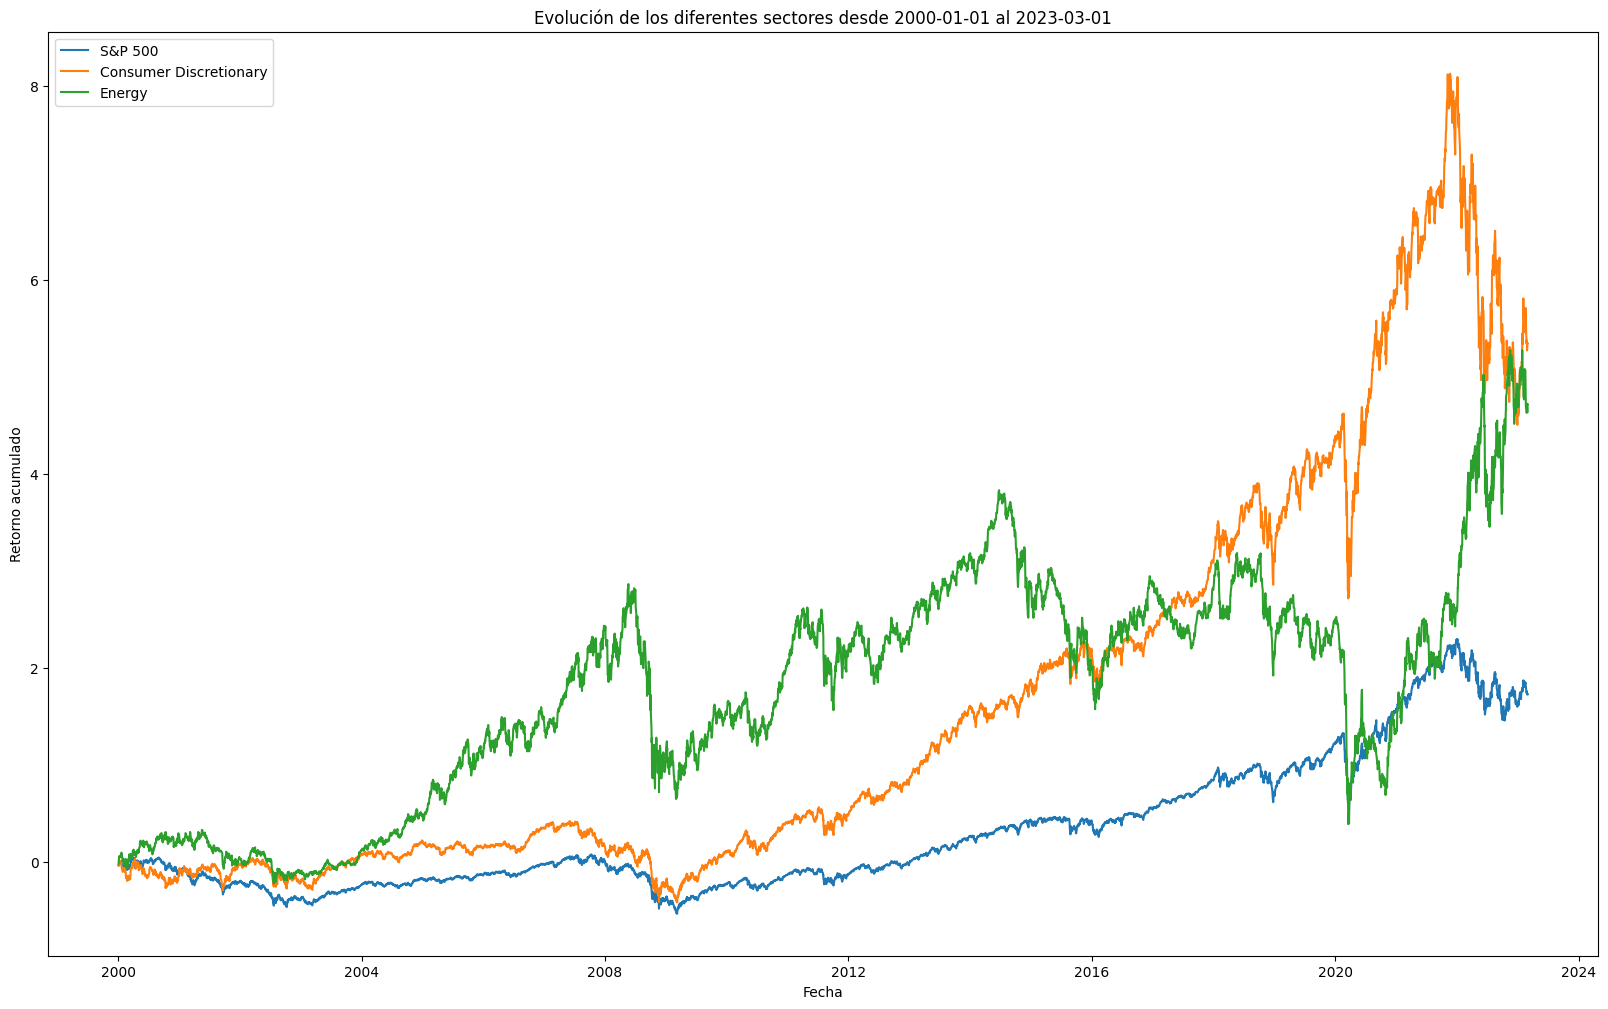

In [113]:
import yfinance as yf
import matplotlib.pyplot as plt

# Definir el período de tiempo
start_date = "2000-01-01"
end_date = "2023-03-01"

# Obtener los datos del S&P 500
sp500 = yf.download("^GSPC", start=start_date, end=end_date)

# Definir los nombres de los sectores
sector_names = {
    "XLY": "Consumer Discretionary",
    "XLE": "Energy"
}

# Obtener los datos de los diferentes sectores
sectors = list(sector_names.keys())
sector_data = yf.download(sectors, start=start_date, end=end_date)

# Obtener los precios de cierre ajustados
sp500_close = sp500["Adj Close"]
sector_close = sector_data["Adj Close"]

# Calcular los retornos diarios
sp500_returns = sp500_close.pct_change()
sector_returns = sector_close.pct_change()

# Calcular los retornos acumulados
sp500_cum_returns = (1 + sp500_returns).cumprod() - 1
sector_cum_returns = (1 + sector_returns).cumprod() - 1

# Crear el gráfico de líneas
plt.figure(figsize=(20, 12))
plt.plot(sp500_cum_returns.index, sp500_cum_returns, label="S&P 500")
for sector in sectors:
    plt.plot(sector_cum_returns[sector].index, sector_cum_returns[sector], label=sector_names[sector])
plt.legend()
plt.title("Evolución de los diferentes sectores desde 2000-01-01 al 2023-03-01")
plt.xlabel("Fecha")
plt.ylabel("Retorno acumulado")
plt.savefig("Evolucion_de_ConsumerDiscretionary_VS_Energy.png")
plt.show()

[*********************100%***********************]  5 of 5 completed


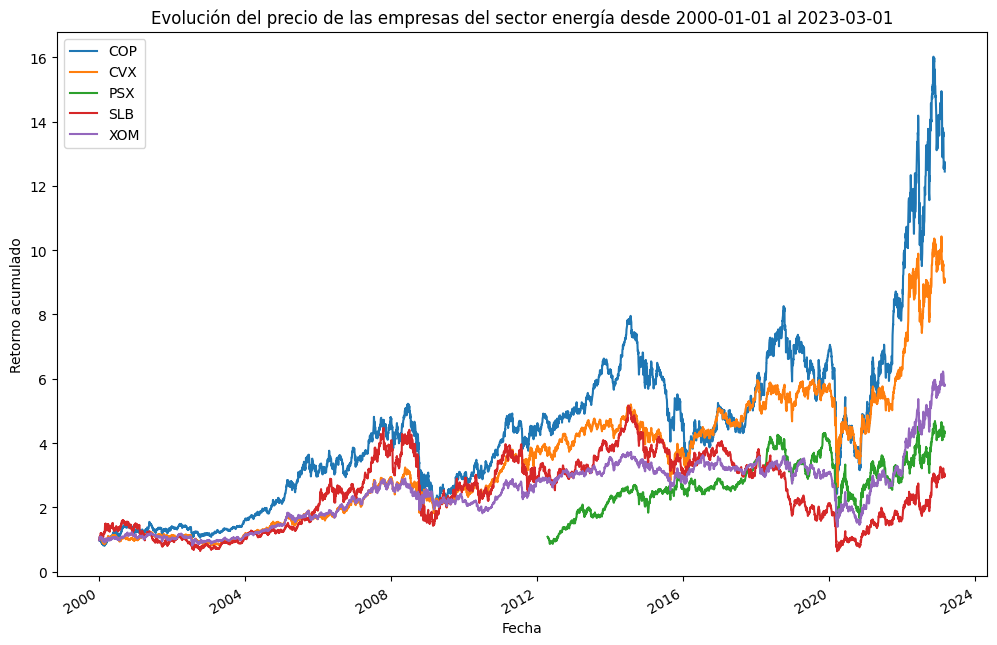

In [114]:
import yfinance as yf
import matplotlib.pyplot as plt

# Definir el período de tiempo
start_date = "2000-01-01"
end_date = "2023-03-01"

# Definir los símbolos de las empresas del sector energía
symbols = ["XOM", "CVX", "COP", "SLB", "PSX"]

# Obtener los precios de cierre ajustados de las empresas del sector energía
data = yf.download(symbols, start=start_date, end=end_date)["Adj Close"]

# Calcular los retornos acumulados
cum_returns = (1 + data.pct_change()).cumprod()

# Crear el gráfico de líneas
cum_returns.plot(figsize=(12, 8))
plt.title("Evolución del precio de las empresas del sector energía desde 2000-01-01 al 2023-03-01")
plt.xlabel("Fecha")
plt.ylabel("Retorno acumulado")
plt.savefig("Evolucion_sector_Energy.png")
plt.show()
cum_returns.to_csv("Evolucion_sector_Energy.csv")

[*********************100%***********************]  6 of 6 completed


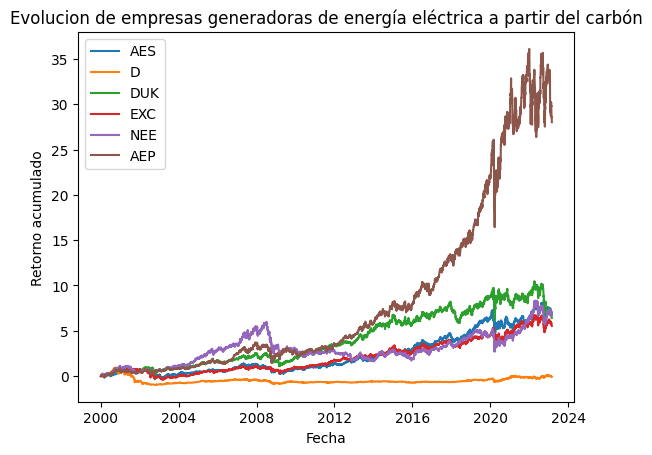

In [115]:
import yfinance as yf
import matplotlib.pyplot as plt

# Definir el período de tiempo
start_date = "2000-01-01"
end_date = "2023-03-01"

# Definir los símbolos de las empresas
symbols = ["AES", "D", "DUK", "EXC", "NEE", "AEP"]

# Obtener los datos de las empresas
data = yf.download(symbols, start=start_date, end=end_date)

# Obtener los precios de cierre ajustados
close = data["Adj Close"]

# Calcular los retornos acumulados
cum_returns = (1 + close.pct_change()).cumprod() - 1

# Crear el gráfico de líneas
plt.plot(cum_returns.index, cum_returns)
plt.legend(symbols)
plt.title("Evolucion de empresas generadoras de energía eléctrica a partir del carbón")
plt.xlabel("Fecha")
plt.ylabel("Retorno acumulado")
plt.savefig("Evolucion_de_empresas_generadoras_de_energía_eléctrica_a_partir_del_carbón.png")
plt.show()
cum_returns2 =  cum_returns
cum_returns2.to_csv("Evolucion_de_empresas_generadoras_de_energía_eléctrica_a_partir_del_carbón.csv")

[*********************100%***********************]  1 of 1 completed


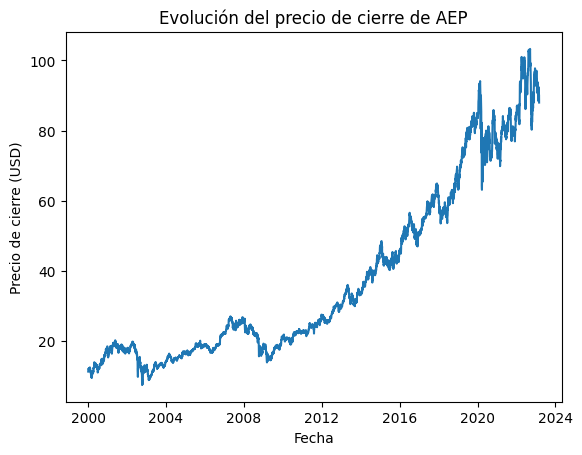

In [116]:
import yfinance as yf
import matplotlib.pyplot as plt

# Obtener datos de precios históricos de NEE
data = yf.download("AEP", start="2000-01-01", end="2023-03-01")

# Graficar la evolución del precio de cierre (Close) de AEP
plt.plot(data['Adj Close'])
plt.title("Evolución del precio de cierre de AEP")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre (USD)")
plt.savefig("Evolución_de_American_Electric_Power.png")
plt.show()
data.to_csv("Evolución_de_American_Electric_Power.csv")

[*********************100%***********************]  1 of 1 completed


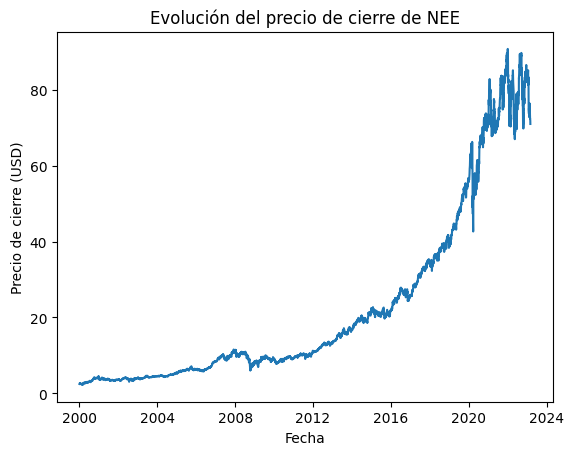

In [117]:
import yfinance as yf
import matplotlib.pyplot as plt

# Obtener datos de precios históricos de NEE
data = yf.download("NEE", start="2000-01-01", end="2023-03-01")

# Graficar la evolución del precio de cierre (Close) de NEE
plt.plot(data['Adj Close'])
plt.title("Evolución del precio de cierre de NEE")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre (USD)")
plt.savefig("Evolución_del_precio_de_cierre_de_NEE.png")
plt.show()
data.to_csv("Evolución del precio de cierre de NEE.csv")

In [118]:
retornoTotal = (SP500Companies.groupby('Symbol')['Adj Close'].last() - SP500Companies.groupby('Symbol')['Adj Close'].first()) / SP500Companies.groupby('Symbol')['Adj Close'].first()
# Seleccionar las diez primeras compañías con el mayor retorno total
retornoTotalTop10 = retornoTotal.nlargest(10)
retornoTotalTop10
retornoTotalTop10.to_csv("retornoTotalTop10.csv")

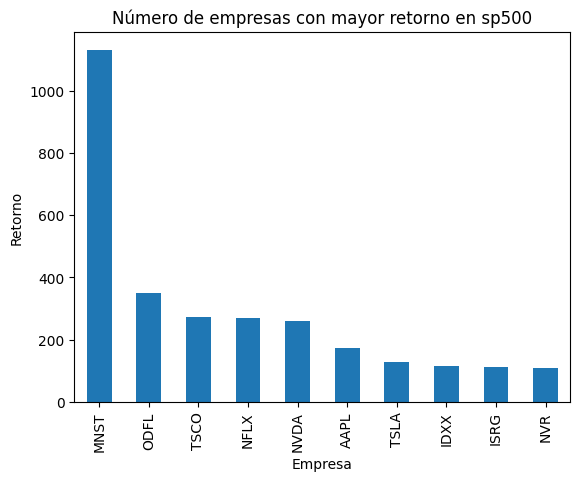

In [119]:
#Grafico
retornoTotalTop10.plot(kind='bar')

    
plt.title('Número de empresas con mayor retorno en sp500')
plt.xlabel('Empresa')
plt.ylabel('Retorno')


plt.savefig("Número_de_empresas_con_mayor_retorno_en_sp500.png")
plt.show()

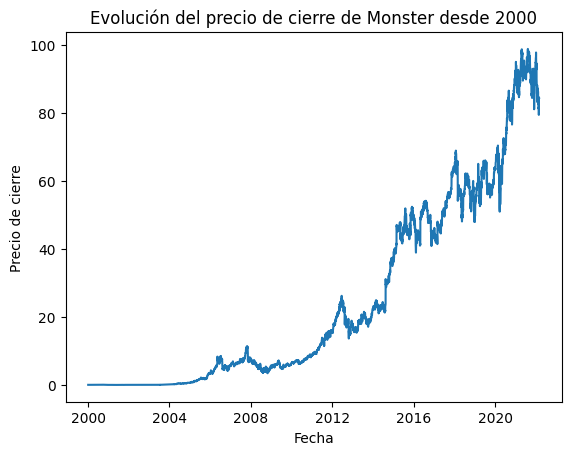

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos de precios de Monster desde Yahoo Finance
df = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/MNST?period1=946684800&period2=1646102400&interval=1d&events=history&includeAdjustedClose=true')

# Seleccionar solo la columna de precios de cierre y convertir la fecha a formato datetime
df = df[['Date', 'Adj Close']]
df['Date'] = pd.to_datetime(df['Date'])

# Establecer la fecha como el índice del DataFrame
df.set_index('Date', inplace=True)

# Graficar la evolución del precio de cierre de Monster
plt.plot(df)
plt.title('Evolución del precio de cierre de Monster desde 2000')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.savefig("Evolución_de_Monster.png")
plt.show()
df.to_csv("Evolucion_de_Monster.csv")

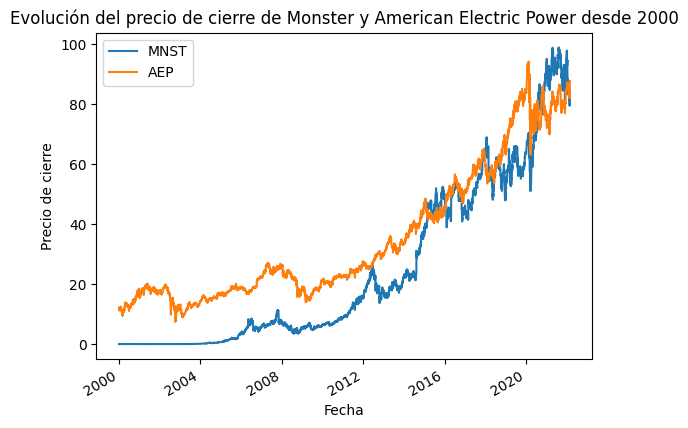

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos de precios de Monster y American Electric Power desde Yahoo Finance
tickers = ['MNST', 'AEP']
df = pd.DataFrame()

for ticker in tickers:
    temp_df = pd.read_csv(f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1=946684800&period2=1646102400&interval=1d&events=history&includeAdjustedClose=true')
    temp_df = temp_df[['Date', 'Adj Close']]
    temp_df['Date'] = pd.to_datetime(temp_df['Date'])
    temp_df.set_index('Date', inplace=True)
    temp_df.rename(columns={'Adj Close': ticker}, inplace=True)
    if df.empty:
        df = temp_df
    else:
        df = df.join(temp_df)

# Graficar la evolución del precio de cierre de Monster y American Electric Power
df.plot()
plt.title('Evolución del precio de cierre de Monster y American Electric Power desde 2000')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.savefig('Monster_vs_AEP.png')
plt.show()
df.to_csv('Monster_vs_AEP.csv')


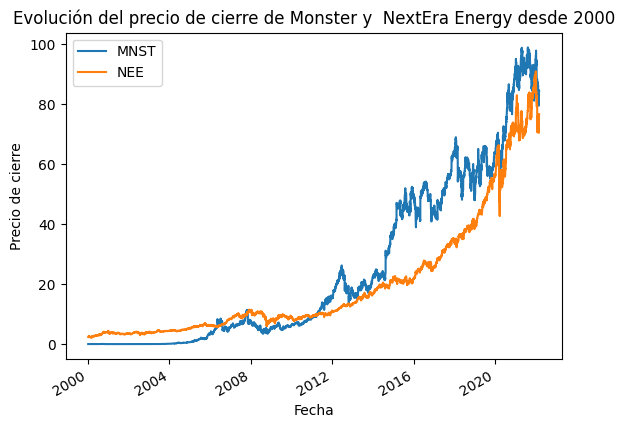

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos de precios de Monster y American Electric Power desde Yahoo Finance
tickers = ['MNST', 'NEE']
df = pd.DataFrame()

for ticker in tickers:
    temp_df = pd.read_csv(f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1=946684800&period2=1646102400&interval=1d&events=history&includeAdjustedClose=true')
    temp_df = temp_df[['Date', 'Adj Close']]
    temp_df['Date'] = pd.to_datetime(temp_df['Date'])
    temp_df.set_index('Date', inplace=True)
    temp_df.rename(columns={'Adj Close': ticker}, inplace=True)
    if df.empty:
        df = temp_df
    else:
        df = df.join(temp_df)

# Graficar la evolución del precio de cierre de Monster y American Electric Power
df.plot()
plt.title('Evolución del precio de cierre de Monster y  NextEra Energy desde 2000')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.savefig('Monster_vs_NEE.png')
plt.show()
df.to_csv('Monster_vs_NEE.csv')

[*********************100%***********************]  11 of 11 completed


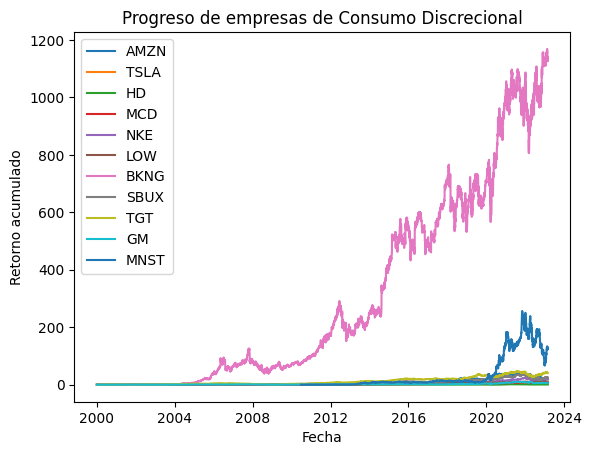

In [126]:
import yfinance as yf
import matplotlib.pyplot as plt

# Definir el período de tiempo
start_date = "2000-01-01"
end_date = "2023-03-01"

# Definir los símbolos de las empresas
symbols = ["AMZN", "TSLA", "HD", "MCD", "NKE", "LOW","BKNG","SBUX","TGT","GM","MNST"]

# Obtener los datos de las empresas
data = yf.download(symbols, start=start_date, end=end_date)

# Obtener los precios de cierre ajustados
close = data["Adj Close"]

# Calcular los retornos acumulados
cum_returns = (1 + close.pct_change()).cumprod() - 1

# Crear el gráfico de líneas
plt.plot(cum_returns.index, cum_returns)
plt.legend(symbols)
plt.title("Progreso de empresas de Consumo Discrecional")
plt.xlabel("Fecha")
plt.ylabel("Retorno acumulado")
plt.savefig("Progreso de empresas de Consumo Discrecional.png")
plt.show()
cum_returns2 =  cum_returns
cum_returns2.to_csv("Progreso_de_empresas_de_Consumo_Discrecional.csv")